In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import re
import nltk
from nltk import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shahz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shahz\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [4]:
validate = pd.read_csv('./Dataset/twitter_validation.csv',header= None)
train = pd.read_csv('./Dataset/twitter_training.csv')

In [5]:
train.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:
train.columns = ['ID','Information','Type','Text']
validate.columns = ['ID','Information','Type','Text']

In [7]:
train.head(1)

,ID,Information,Type,Text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...


In [8]:
validate.head(1)

,ID,Information,Type,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...


In [9]:
train_df = train
val_df = validate


In [16]:
train_df['lower']=train_df.Text.str.lower()
train_df['lower']=[str(data) for data in train_df.lower]
train_df['lower']=train_df.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+',' ',x))

In [17]:
val_df['lower']=val_df.Text.str.lower()
val_df['lower']=[str(data) for data in val_df.lower]
val_df['lower']=val_df.lower.apply(lambda x: re.sub('[^A-Za-z0-9]+',' ',x))

In [18]:
train_df.head()

,ID,Information,Type,Text,lower
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,i am coming to the borders and i will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,im getting into borderlands and i can murder y...


In [19]:
val_df.head()

,ID,Information,Type,Text,lower
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...,i mentioned on facebook that i was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...,bbc news amazon boss jeff bezos rejects claims...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...,microsoft why do i pay for word when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,...",csgo matchmaking is so full of closet hacking ...
4,4433,Google,Neutral,Now the President is slapping Americans in the...,now the president is slapping americans in the...


Text(0.5, 1.0, 'Distribution of Tweets per Branch and Type')

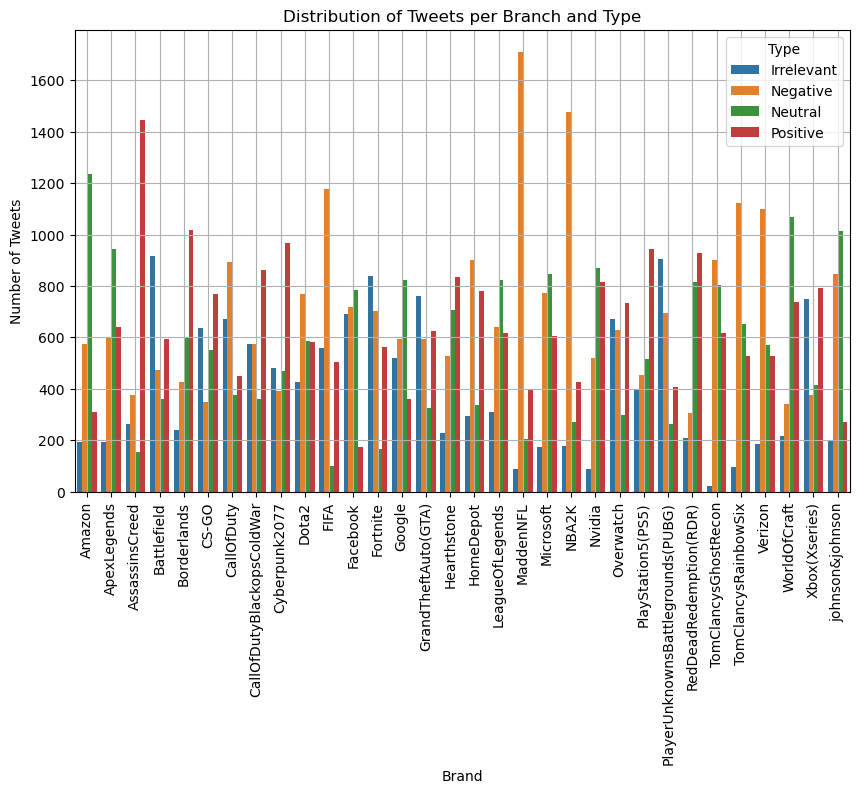

In [22]:
info_type = train.groupby(by=['Information','Type']).count().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(data=info_type,x='Information',y='ID',hue='Type')
plt.xticks(rotation=90)
plt.xlabel('Brand')
plt.ylabel('Number of Tweets')
plt.grid()
plt.title('Distribution of Tweets per Branch and Type')

In [23]:
tokens_text = [word_tokenize(str(word)) for word in train_df.lower]

In [24]:
tokens_text

[['i',
  'am',
  'coming',
  'to',
  'the',
  'borders',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'kill',
  'you',
  'all'],
 ['im',
  'coming',
  'on',
  'borderlands',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'all'],
 ['im',
  'getting',
  'on',
  'borderlands',
  '2',
  'and',
  'i',
  'will',
  'murder',
  'you',
  'me',
  'all'],
 ['im',
  'getting',
  'into',
  'borderlands',
  'and',
  'i',
  'can',
  'murder',
  'you',
  'all'],
 ['so',
  'i',
  'spent',
  'a',
  'few',
  'hours',
  'making',
  'something',
  'for',
  'fun',
  'if',
  'you',
  'don',
  't',
  'know',
  'i',
  'am',
  'a',
  'huge',
  'borderlands',
  'fan',
  'and',
  'maya',
  'is',
  'one',
  'of',
  'my',
  'favorite',
  'characters',
  'so',
  'i',
  'decided',
  'to',
  'make',
  'myself',
  'a',
  'wallpaper',
  'for',
  'my',
  'pc',
  'here',
  'is',
  'the',
  'original',
  'image',
  'versus',
  'the',
  'c

In [26]:
stopwords_nltk = nltk.corpus.stopwords
stop_words = stopwords_nltk.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [27]:
bow_counts = CountVectorizer(tokenizer=word_tokenize,stop_words=stop_words,ngram_range=(1,1))

In [28]:
bow_counts

CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...],
                tokenizer=<function word_tokenize at 0x000001ED487D3740>)

In [29]:
reviews_train, reviews_test = train_test_split(train_df,test_size=0.2 , random_state=42)

In [31]:
x_train_bow = bow_counts.fit_transform(reviews_train.lower)
x_test_bow = bow_counts.transform(reviews_test.lower)

In [33]:
y_train_bow = reviews_train['Type']
y_test_bow = reviews_test['Type']

In [34]:
y_test_bow

34877    Irrelevant
21704      Positive
47008      Negative
7969     Irrelevant
454        Positive
            ...    
52360    Irrelevant
57296      Positive
35884      Positive
59060      Negative
4740        Neutral
Name: Type, Length: 14937, dtype: object

In [37]:
logistic_reg = LogisticRegression(C=1, solver='liblinear',max_iter=200)
logistic_reg.fit(x_train_bow, y_train_bow)
test_pred = logistic_reg.predict(x_test_bow)
print('Accuracy:',accuracy_score(y_test_bow, test_pred))

Accuracy: 0.8156256276360715


c:\Users\shahz\AppData\Local\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [38]:
x_val_bow = bow_counts.transform(val_df.lower)
y_val_bow = val_df['Type']

In [39]:
y_val_bow

0      Irrelevant
1         Neutral
2        Negative
3        Negative
4         Neutral
          ...    
995    Irrelevant
996    Irrelevant
997      Positive
998      Positive
999       Neutral
Name: Type, Length: 1000, dtype: object